In [ ]:
import pandas as pd
import os
from sqlalchemy import create_engine
import time
import sqlite3

In [ ]:
# Create SQLite engine
engine = create_engine('sqlite:///inventory.db')

In [ ]:
'''Below funation will injest the dataframe into database table'''
def ingest_db(df, table_name, engine):
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)

In [ ]:
'''Below functoin will load the CSVs as data frame and injest into db'''
#def load_raw_data():
start = time.time()
for file in os.listdir('/content/pro/'):
    # put the location of your file in place of '/content/project'
          df = pd.read_csv('/content/pro/' + file)
          print(df.shape)
          ingest_db(df, file[:-4], engine)
end = time.time()
total_time = end - start

(4747644, 14)
(5543, 10)
(2372474, 16)
(224489, 9)
(12261, 9)
(206529, 9)


In [ ]:
print(total_time)

184.0915403366089


**Exploratry Data Anlysis**

In [ ]:

# Creating database connection
conn = sqlite3.connect('inventory.db')



In [ ]:
# Checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

# Display the result
print(tables)

              name
0            sales
1   vendor_invoice
2        purchases
3    end_inventory
4  purchase_prices
5  begin_inventory


In [ ]:
for table in tables['name']:
    print('-' * 50, f'{table}', '-' * 50)
    display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5", conn))
    print('Count of records:', pd.read_sql(f"SELECT COUNT(*) AS count FROM {table}", conn)['count'].values[0])

-------------------------------------------------- sales --------------------------------------------------


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


Count of records: 119003
-------------------------------------------------- vendor_invoice --------------------------------------------------


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


Count of records: 5543
-------------------------------------------------- purchases --------------------------------------------------


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124.0,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169.0,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5.0,106.60,1.0


Count of records: 96750
-------------------------------------------------- end_inventory --------------------------------------------------


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1.0,HARDERSFIELD,58.0,Gekkeikan Black & Gold Sake,750mL,11.0,12.99,2024-12-31
1,1_HARDERSFIELD_62,1.0,HARDERSFIELD,62.0,Herradura Silver Tequila,750mL,7.0,36.99,2024-12-31
2,1_HARDERSFIELD_63,1.0,HARDERSFIELD,63.0,Herradura Reposado Tequila,750mL,7.0,38.99,2024-12-31
3,1_HARDERSFIELD_72,1.0,HARDERSFIELD,72.0,No. 3 London Dry Gin,750mL,4.0,34.99,2024-12-31
4,1_HARDERSFIELD_75,1.0,HARDERSFIELD,75.0,Three Olives Tomato Vodka,750mL,7.0,14.99,2024-12-31


Count of records: 174092
-------------------------------------------------- purchase_prices --------------------------------------------------


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


Count of records: 12261
-------------------------------------------------- begin_inventory --------------------------------------------------


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8.0,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7.0,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6.0,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3.0,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6.0,34.99,2024-01-01


Count of records: 174042


In [ ]:
# choosing one vendor and filtering the different tables
purchases = pd.read_sql_query("select * from purchases where VendorNumber = 4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4.0,37.40,1.0
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5.0,47.05,1.0
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137.0,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6.0,56.10,1.0
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207.0,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6.0,56.46,1.0
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207.0,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6.0,56.46,1.0
5,67_EANVERNESS_5215,67,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207.0,2023-12-27,2024-01-08,2024-01-19,2024-02-26,9.41,6.0,56.46,1.0
6,48_NORFOLK_5255,48,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207.0,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.35,6.0,56.10,1.0
7,74_PAENTMARWY_5215,74,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207.0,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6.0,56.46,1.0
8,23_ARBINGTON_5255,23,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207.0,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.35,6.0,56.10,1.0
9,14_BROMWICH_5215,14,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207.0,2023-12-27,2024-01-06,2024-01-19,2024-02-26,9.41,6.0,56.46,1.0


In [ ]:
purchase_prices = pd.read_sql_query("select * from purchase_prices where VendorNumber = 4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
vendor_invoice = pd.read_sql_query("select * from vendor_invoice where VendorNumber = 4466",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [ ]:
sales = pd.read_sql_query("select * from sales where VendorNo = 4466",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
5,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-31,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
6,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-01-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
7,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-01-07,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
8,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-01-14,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,2,25.98,12.99,2024-01-15,1750.0,1,3.67,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
purchases.groupby(["Brand","PurchasePrice"])[["Quantity","Dollars"]].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
5215,9.41,173.0,1627.93
5255,9.35,290.0,2711.50


In [ ]:
purchases.groupby(["PONumber"])[["Quantity","Dollars"]].sum()

,Quantity,Dollars
PONumber,,
8137.0,15.0,140.55
8207.0,335.0,3142.33
8307.0,41.0,383.35
8469.0,72.0,673.20


In [ ]:
sales.groupby("Brand")[['SalesQuantity','SalesDollars','SalesPrice','ExciseTax']].sum()

,SalesQuantity,SalesDollars,SalesPrice,ExciseTax
Brand,,,,
5215,24,311.76,285.78,44.14
5255,35,454.65,337.74,64.33




*   The purchases table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.
*   The purchase price column is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.
*   The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with an additional column for freight. This table maintains uniqueness based on vendor and PO number.
*   The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.






As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:


  *   purchase transactions made by vendors
  *   sales transaction data

  *   freight costs for each vendor
  *   actual product prices from vendors

  
Let's first explore each summary in different tables.  





In [ ]:
freight_summary = pd.read_sql_query("""SELECT
    VendorNumber,
    SUM(Freight) as FreightCost
FROM vendor_invoice
GROUP BY VendorNumber""", conn)
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [ ]:
purchase_summary = pd.read_sql_query("""SELECT
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Price as ActualPrice,
    pp.Volume,
    SUM(p.Quantity) AS TotalPurchaseQuantity,
    SUM(p.Dollars) AS TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
    ON p.Brand = pp.Brand
WHERE p.PurchasePrice > 0
GROUP BY p.VendorNumber,p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
ORDER BY TotalPurchaseDollars
""",conn)
purchase_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars
0,8664,"STOLI GROUP,(USA) LLC",3147,Stolichnaya Chocolat Kokonut,0.71,0.99,50,1.0,0.71
1,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750,1.0,2.25
2,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750,1.0,3.37
3,2000,SOUTHERN WINE & SPIRITS NE,45293,C K Mondavi Willw Pnt Grigio,4.69,6.99,750,1.0,4.69
4,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50,7.0,5.04
...,...,...,...,...,...,...,...,...,...
4732,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,6687.0,146378.43
4733,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750,8504.0,151116.08
4734,480,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750,12614.0,178740.38
4735,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750,13931.0,180267.14


In [ ]:
sales_summary = pd.read_sql_query("""SELECT
    VendorNo,
    Brand,
    SUM(SalesQuantity) AS TotalSalesQuantity,
    SUM(SalesDollars) AS TotalSalesDollars,
    SUM(SalesPrice) AS TotalSalesPrice,
    SUM(ExciseTax) AS TotalExciseTax
FROM sales
GROUP BY VendorNo, Brand""",conn)
sales_summary

,VendorNo,Brand,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax
0,105,8412,2,99.98,99.98,1.58
1,105,8419,5,34.95,34.95,0.50
2,388,2034,17,492.83,463.84,13.42
3,388,2119,1,84.99,84.99,0.79
4,480,126,352,11210.48,3263.00,369.60
...,...,...,...,...,...,...
4407,98450,4145,67,1138.33,594.65,123.14
4408,98450,7890,15,449.85,299.90,11.82
4409,98450,8543,8,159.92,79.96,6.30
4410,172662,4215,6,155.94,25.99,4.72


In [ ]:
# merging all the summary table to create an aggregated summary table for further analysis
vendor_sales_summary = pd.read_sql_query("""WITH FreightSummary AS (
    SELECT
        VendorNumber,
        SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),

PurchaseSummary AS (
    SELECT
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price AS ActualPrice,
        pp.Volume,
        SUM(p.Quantity) AS TotalPurchaseQuantity,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
        ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
),
SalesSummary AS (
    SELECT
        VendorNo,
        Brand,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
)
SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC""",conn)

In [ ]:
ingest_db(vendor_sales_summary, 'vendor_sales_summary', engine)
pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,11847.0,191565.99,2376.0,52248.24,5607.45,4365.73,257032.07
1,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750,13931.0,180267.14,575.0,10344.25,2788.45,1056.45,257032.07
2,480,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750,12614.0,178740.38,1206.0,21695.94,3454.08,2215.87,89286.27
3,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750,8504.0,151116.08,861.0,20655.39,5157.85,677.88,89286.27
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,6687.0,146378.43,1010.0,30401.90,6065.99,1855.73,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50,7.0,5.04,82.0,81.18,36.63,4.26,89286.27
4733,2000,SOUTHERN WINE & SPIRITS NE,45293,C K Mondavi Willw Pnt Grigio,4.69,6.99,750,1.0,4.69,NaN,NaN,NaN,NaN,19016.59
4734,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750,1.0,3.37,NaN,NaN,NaN,NaN,144929.24
4735,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750,1.0,2.25,NaN,NaN,NaN,NaN,27100.41


In [ ]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost'],
      dtype='object')

This query generates a vendor-wise sales and purchase summary, which is valuable for

**Performance Optimization:**
*   The query involves heavy joins and aggregations on large datasets like sales and purchases.
*  Storing the pre-aggregated results avoids repeated expensive computations.


*   Helps in analyzing sales, purchases, and pricing for different vendors and brands.

*  Future Benefits of Storing this data for faster Dashboarding & Reporting.
*   Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.




---


Let's clean the data if there is any inconsistencies.




**Data Cleaning**

In [ ]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,object
TotalPurchaseQuantity,float64
TotalPurchaseDollars,float64
TotalSalesQuantity,float64


In [ ]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,966


In [ ]:
vendor_sales_summary['Volume'].unique()

array(['1750', '750', '1000', '1500', '375', '50', '100', '5000', '3000',
       '200', '4000', '187', '500', '250', '18000', '720', '150', '300',
       '330', '180'], dtype=object)

In [ ]:
vendor_sales_summary['VendorName'].unique()

array(['DIAGEO NORTH AMERICA INC   ', 'BACARDI USA INC            ',
       'JIM BEAM BRANDS COMPANY    ', 'BROWN-FORMAN CORP          ',
       'MARTIGNETTI COMPANIES', 'SAZERAC CO INC             ',
       'PERNOD RICARD USA          ', 'PROXIMO SPIRITS INC.       ',
       'E & J GALLO WINERY         ', 'CONSTELLATION BRANDS INC   ',
       'STOLI GROUP,(USA) LLC      ', 'CASTLE BRANDS CORP.        ',
       'ULTRA BEVERAGE COMPANY LLP ', 'MOET HENNESSY USA INC      ',
       'CAMPARI AMERICA            ', 'M S WALKER INC             ',
       'HEAVEN HILL DISTILLERIES   ', 'KOBRAND CORPORATION        ',
       'BANFI PRODUCTS CORP        ', 'PERFECTA WINES             ',
       'MAJESTIC FINE WINES        ', 'SAZERAC NORTH AMERICA INC. ',
       'SOUTHERN WINE & SPIRITS NE ', 'DIAGEO CHATEAU ESTATE WINES',
       'SIDNEY FRANK IMPORTING CO  ', 'REMY COINTREAU USA INC     ',
       'STE MICHELLE WINE ESTATES  ', 'PINE STATE TRADING CO      ',
       'EDRINGTON AMERICAS         ', 'W



*   The Volume is a numerical column but having object datatype.
*   There are some products that are not sold, so having missing values.


*   There are white spaces in the categorical columns.




In [ ]:
# creating new columns for better analysis
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars'])*100
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']
vendor_sales_summary['SalesToPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

In [ ]:
# changing datatype to float
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float')

# filling missing value with 0
vendor_sales_summary.fillna(0,inplace = True)

# removing spaces from categorical columns
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()
vendor_sales_summary['Description'] = vendor_sales_summary['Description'].str.strip()

**Saving cleaned data into database**

In [ ]:
cursor = conn.cursor()

In [ ]:
# only runs once
cursor.execute("""CREATE TABLE vendor_sales_summary_1 (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume INT,
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalesToPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
);
""")

In [ ]:
vendor_sales_summary.to_sql('vendor_sales_summary_1', conn, if_exists = 'replace', index = False )

4737

In [ ]:
pd.read_sql_query("select * from vendor_sales_summary_1",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,11847.0,191565.99,2376.0,52248.24,5607.45,4365.73,257032.07,-139317.75,-266.645824,0.200557,0.272743
1,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750.0,13931.0,180267.14,575.0,10344.25,2788.45,1056.45,257032.07,-169922.89,-1642.679653,0.041275,0.057383
2,480,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,1750.0,12614.0,178740.38,1206.0,21695.94,3454.08,2215.87,89286.27,-157044.44,-723.842525,0.095608,0.121382
3,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750.0,8504.0,151116.08,861.0,20655.39,5157.85,677.88,89286.27,-130460.69,-631.606036,0.101246,0.136686
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,6687.0,146378.43,1010.0,30401.90,6065.99,1855.73,257032.07,-115976.53,-381.477901,0.151039,0.207694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50.0,7.0,5.04,82.0,81.18,36.63,4.26,89286.27,76.14,93.791574,11.714286,16.107143
4733,2000,SOUTHERN WINE & SPIRITS NE,45293,C K Mondavi Willw Pnt Grigio,4.69,6.99,750.0,1.0,4.69,0.0,0.00,0.00,0.00,19016.59,0.00,0.000000,0.000000,0.000000
4734,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750.0,1.0,3.37,0.0,0.00,0.00,0.00,144929.24,0.00,0.000000,0.000000,0.000000
4735,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1.0,2.25,0.0,0.00,0.00,0.00,27100.41,0.00,0.000000,0.000000,0.000000


**EDA**

In [ ]:
# Summary statistics for numerical columns
summary_stats = vendor_sales_summary.describe().T
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
VendorNumber,4737.0,9009.491028,15128.251437,105.000000,3252.000000,6785.000000,9552.000000,173357.000000
Brand,4737.0,16641.146084,13473.966748,58.000000,4438.000000,13949.000000,24907.000000,47090.000000
PurchasePrice,4737.0,13.577984,16.672143,0.380000,6.450000,9.080000,14.660000,338.340000
ActualPrice,4737.0,20.073956,23.114000,0.490000,9.990000,13.990000,21.990000,449.990000
Volume,4737.0,903.575047,659.462397,50.000000,750.000000,750.000000,750.000000,18000.000000
TotalPurchaseQuantity,4737.0,292.985223,802.475915,1.000000,24.000000,83.000000,258.000000,18086.000000
TotalPurchaseDollars,4737.0,2712.553863,8447.149392,0.710000,268.320000,865.440000,2399.440000,191565.990000
TotalSalesQuantity,4737.0,56.277391,148.087354,0.000000,2.000000,13.000000,51.000000,2995.000000
TotalSalesDollars,4737.0,721.318064,1988.911051,0.000000,29.990000,208.890000,671.520000,52248.240000
TotalSalesPrice,4737.0,362.463063,664.141255,0.000000,19.980000,129.900000,419.700000,8997.500000


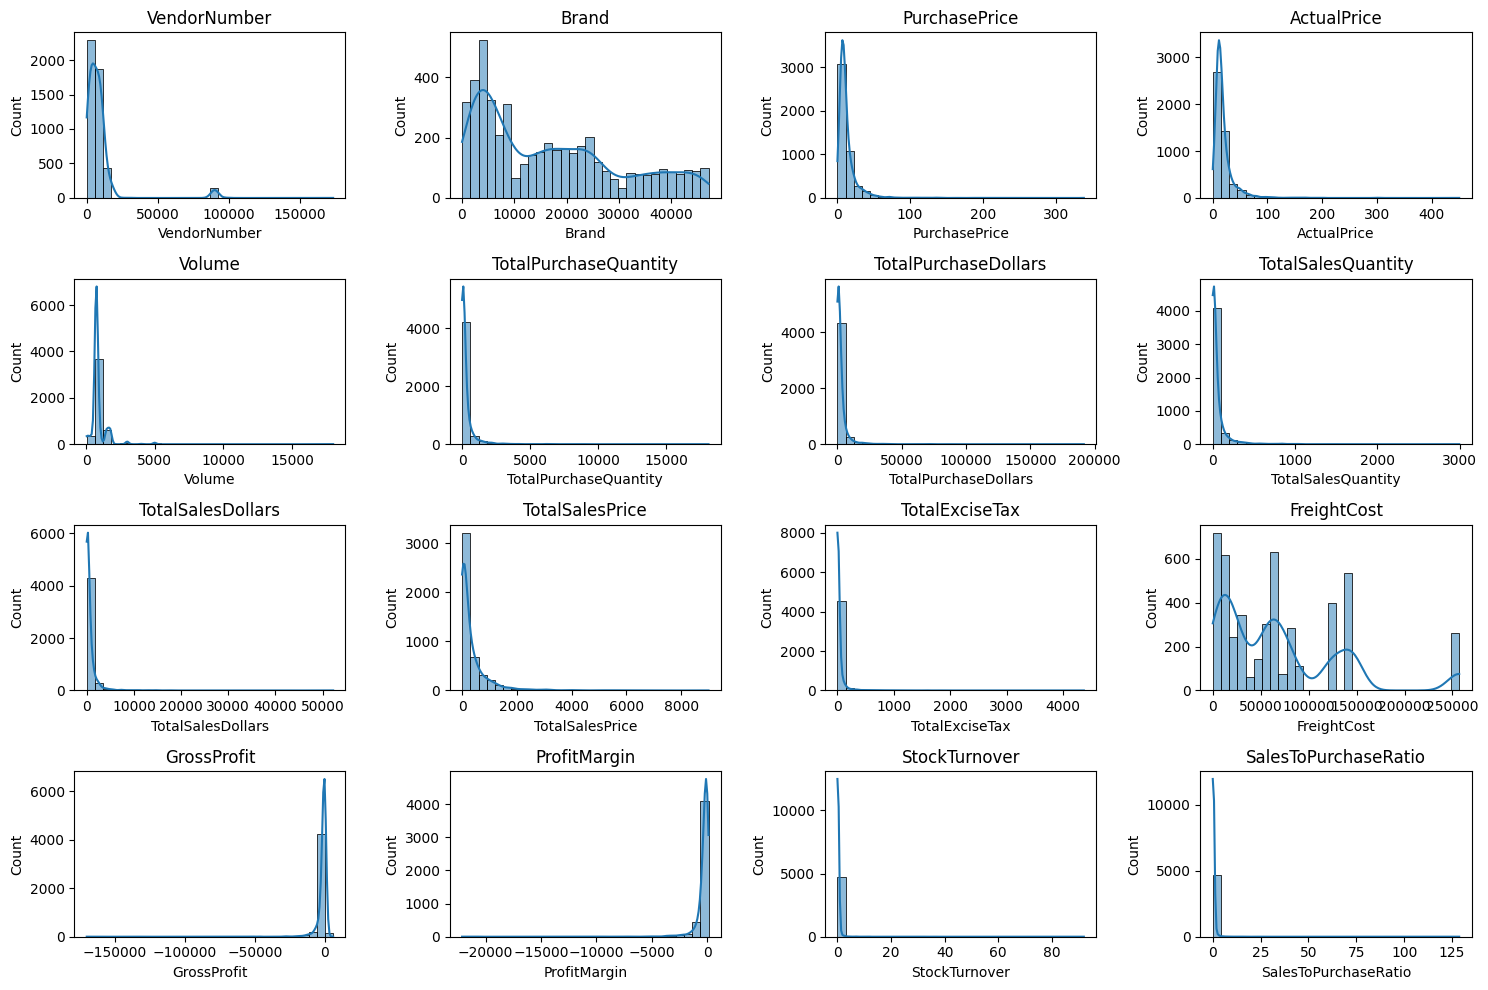

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = vendor_sales_summary.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout as needed
    sns.histplot(vendor_sales_summary[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

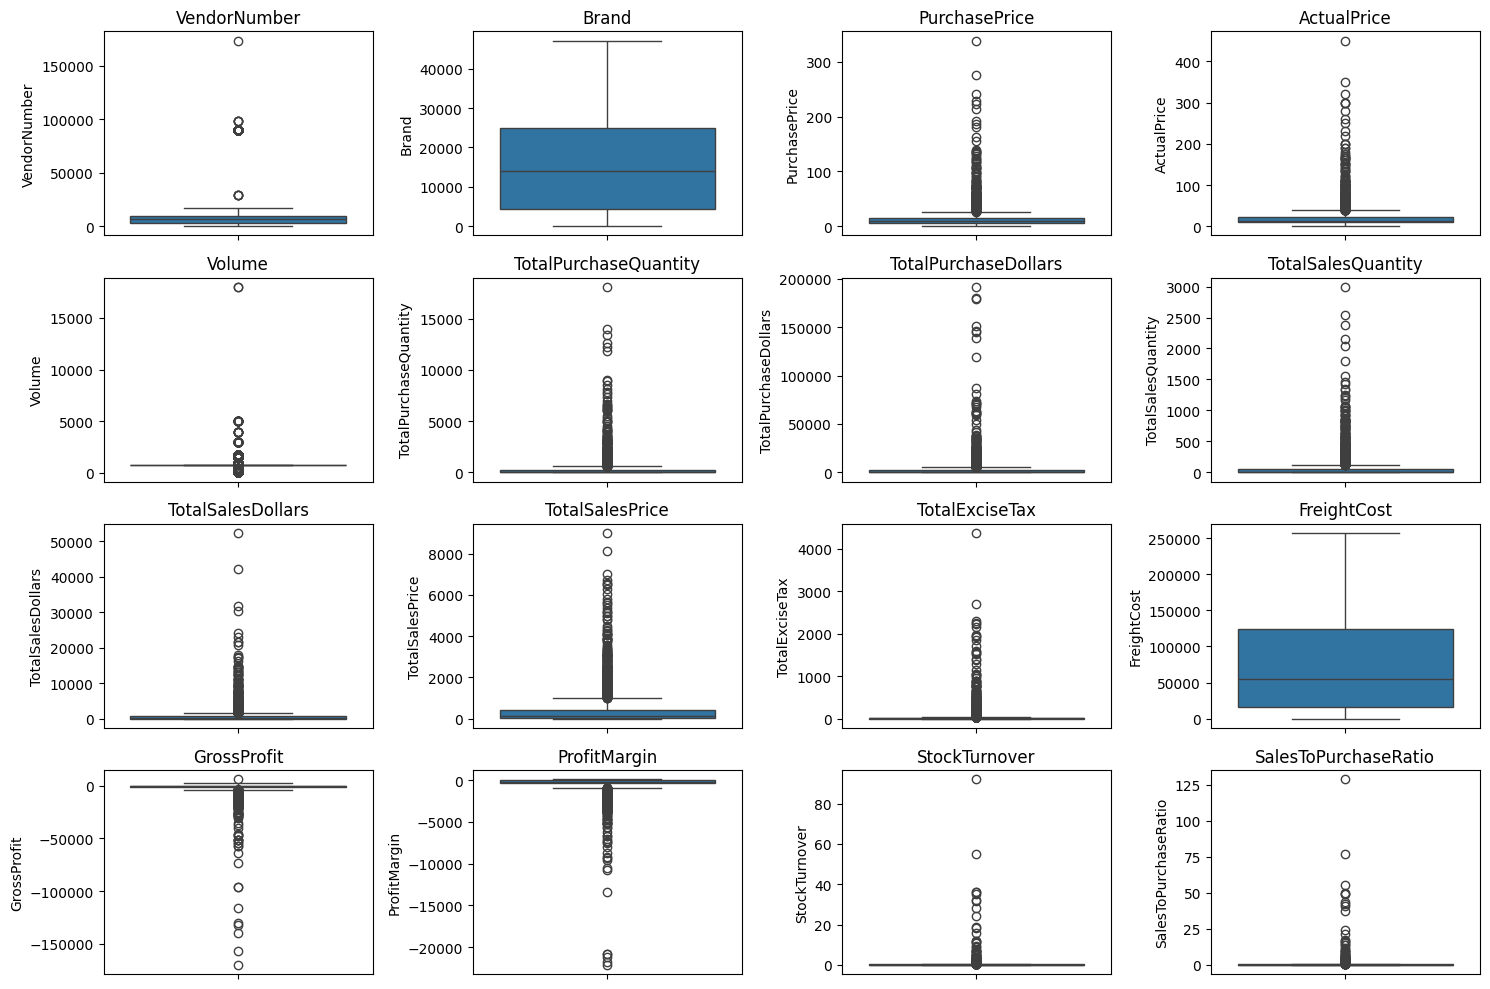

In [ ]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=vendor_sales_summary[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Summary Statistics Insights:**

*Negative & Zero Values:*


*   Gross Profit: Minimum value is -169922.89, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
*   Profit Margin: Has a minimum of -22118.649518, which suggests cases where revenue is zero or even lower than costs.
*   Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.


---

**Outliers Indicated by High Standard Deviations:**


*   Purchase & Actual Prices: The max values (338.34 & 449.99) are significantly higher than the mean (13.57 & 20.07), indicating potential premium products.
*   Freight Cost: Huge variation, from 5.79 to 2,57,032.07, suggests logistics inefficiencies or bulk shipments.
*   Stock Turnover: Ranges from 0 to 92.00, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.











In [ ]:
# let's filter the data by removing inconsistencies
a = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary_1
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)
a

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,3089,SIDNEY FRANK IMPORTING CO,5440,Jagermeister Liqueur,25.92,34.99,1750.0,291.0,7542.72,191.0,7543.09,4103.96,350.94,8549.55,0.37,0.004905,0.656357,1.000049
1,17035,PERNOD RICARD USA,2646,Chivas Regal,43.30,58.99,1750.0,91.0,3940.30,70.0,4169.30,3214.46,128.68,123780.22,229.00,5.492529,0.769231,1.058117
2,9552,M S WALKER INC,12220,Angeline Pnt Nr,5.48,12.99,750.0,391.0,2142.68,206.0,2250.94,1092.00,22.94,55551.82,108.26,4.809546,0.526854,1.050526
3,4425,MARTIGNETTI COMPANIES,36648,Groth Cab Svgn Napa,39.18,59.99,750.0,52.0,2037.36,46.0,2759.54,479.92,5.15,144929.24,722.18,26.170304,0.884615,1.354469
4,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,129.0,1910.49,97.0,1939.03,799.60,76.42,89286.27,28.54,1.471870,0.751938,1.014939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,3960,DIAGEO NORTH AMERICA INC,3917,Smirnoff Peppermint Twist,0.79,0.99,50.0,7.0,5.53,41.0,40.59,21.78,2.11,257032.07,35.06,86.375955,5.857143,7.339964
261,9165,ULTRA BEVERAGE COMPANY LLP,17100,Z-52 Znfdl Lodi Old Vines,5.19,7.99,750.0,1.0,5.19,36.0,287.64,167.79,4.00,68054.70,282.45,98.195661,36.000000,55.421965
262,9165,ULTRA BEVERAGE COMPANY LLP,21691,Tracia Syrah,5.17,7.49,750.0,1.0,5.17,1.0,7.49,7.49,0.11,68054.70,2.32,30.974633,1.000000,1.448743
263,480,BACARDI USA INC,4042,Bacardi Dragon Berry,0.72,0.99,50.0,7.0,5.04,82.0,81.18,36.63,4.26,89286.27,76.14,93.791574,11.714286,16.107143


In [ ]:
a.shape

(265, 18)

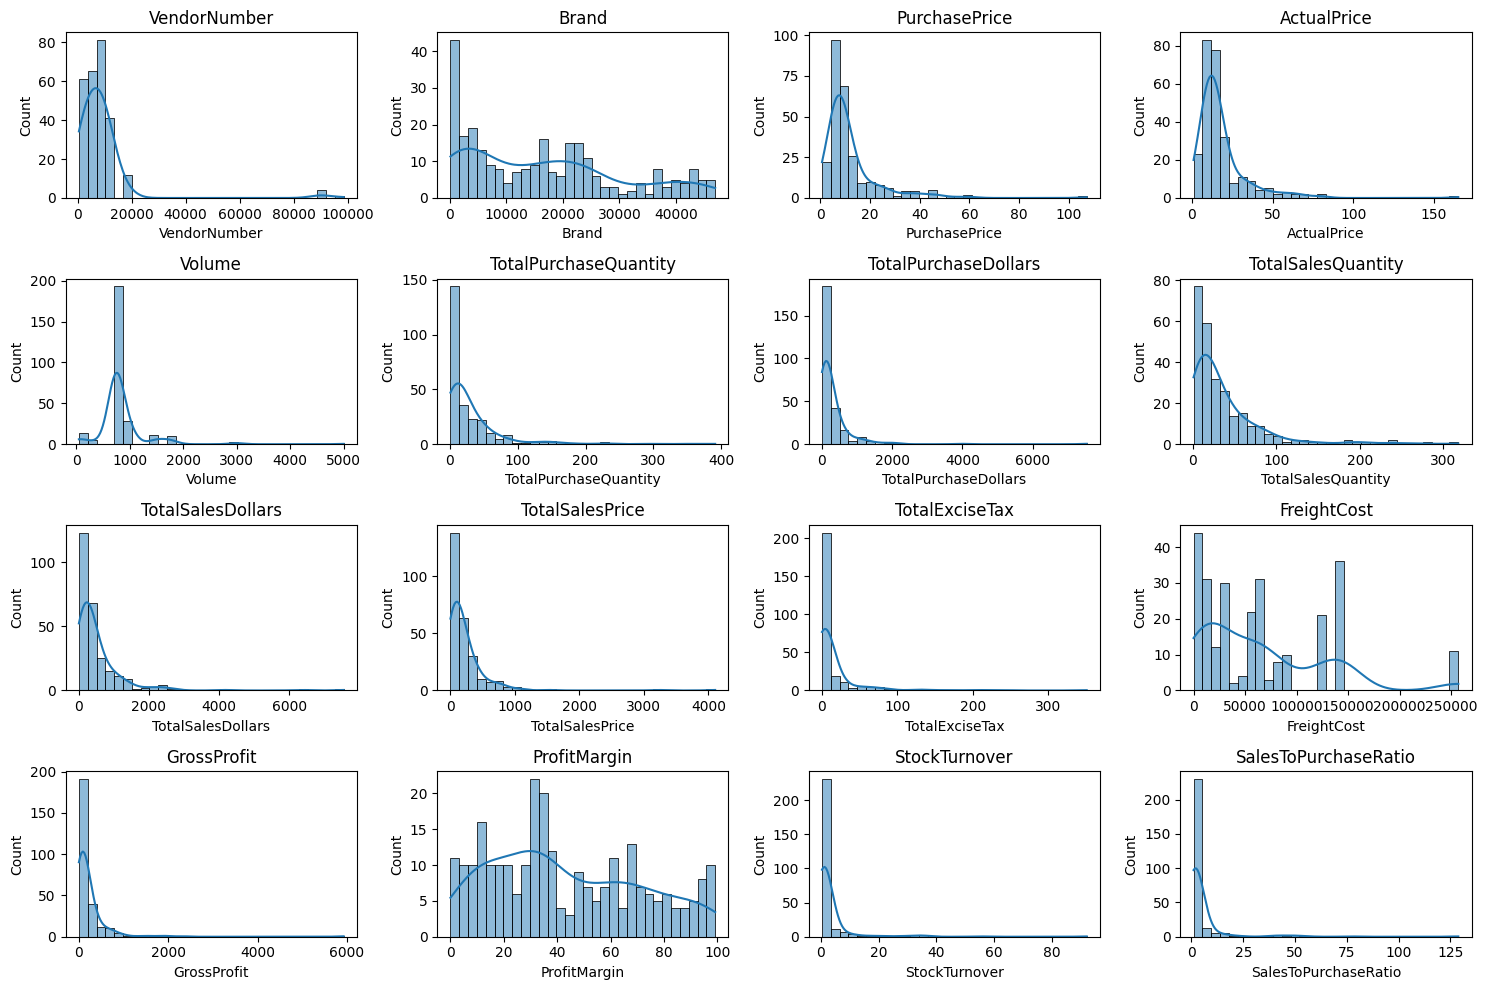

In [ ]:
# Distribution Plots for Numerical Columns
numerical_cols = a.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(a[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

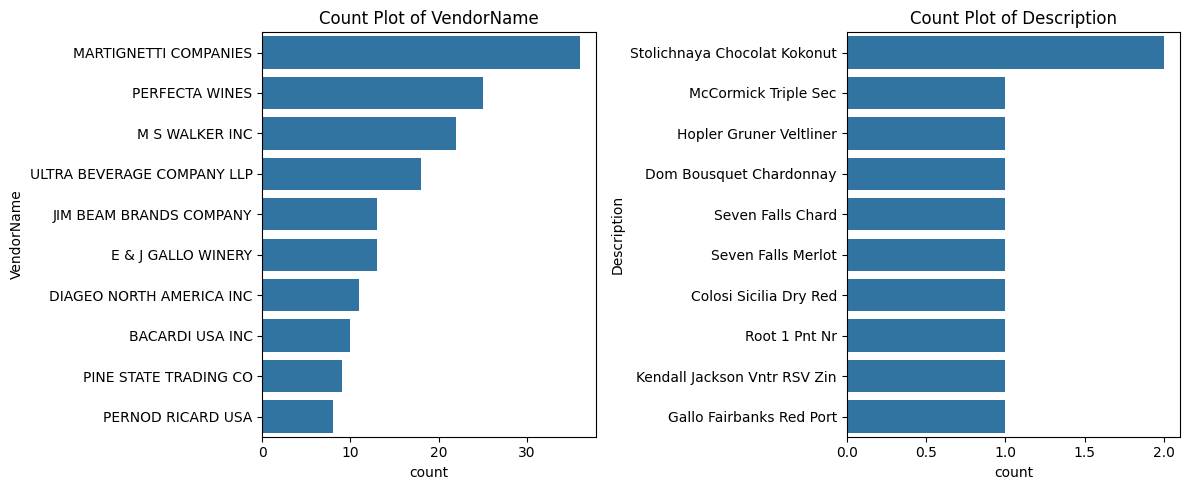

In [ ]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=a[col], order=a[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

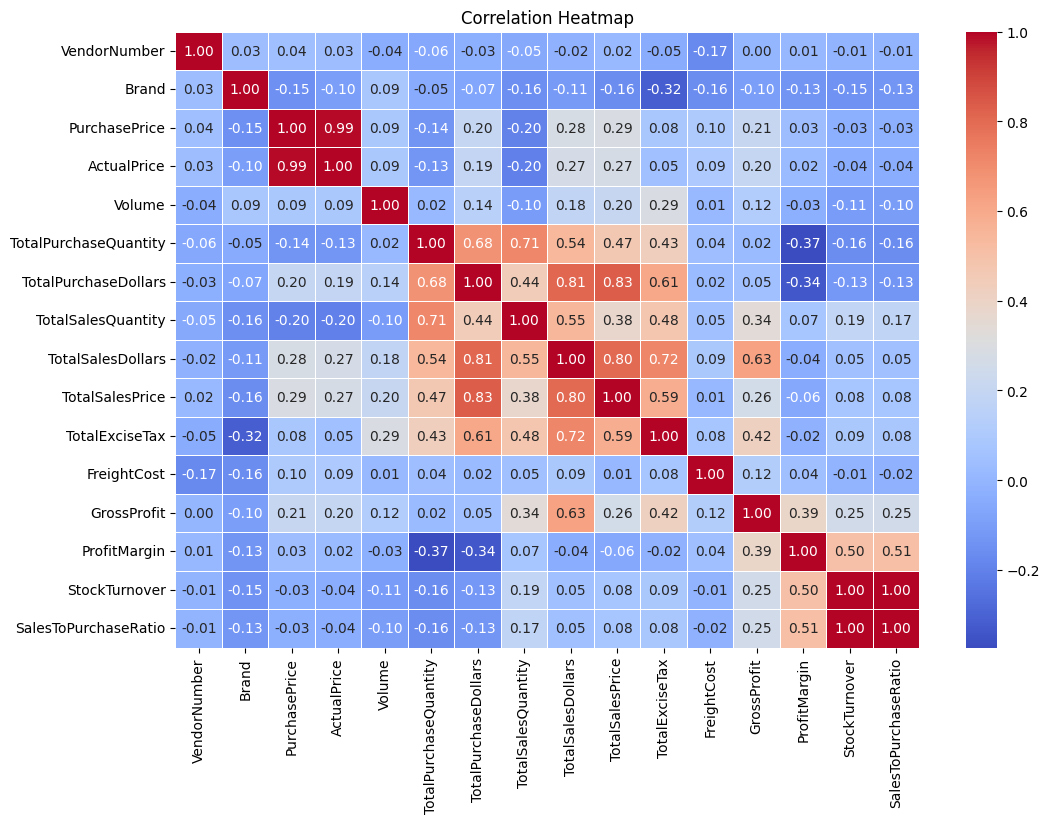

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = a[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Insights**


*   PurchasePrice has positive correlations with TotalSalesDollars (0.28) and GrossProfit (0.21), suggesting that price variations do not significantly impact sales revenue or profit.
*   Strong correlation between total purchase quantity and total sales quantity (0.71), confirming efficient inventory turnover.


*   Negative correlation between profit margin & total sales price (-0.06) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
*   StockTurnover has positive correlations with both GrossProfit (0.25) and ProfitMargin (0.50), indicating that faster turnover resulted in profitability.





**Data Analysis**

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [ ]:
brand_performance = a.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
}).reset_index()

brand_performance.sort_values('ProfitMargin')

,Description,TotalSalesDollars,ProfitMargin
127,Jagermeister Liqueur,7543.09,0.004905
54,Ch M Vert Lussac St Emilion,1036.26,0.704456
51,Carolans Irish Cream,827.64,0.904983
199,Root 1 Pnt Nr,82.93,1.024961
79,Dom Bousquet Chardonnay,87.92,1.319381
...,...,...,...
179,Patron Silver Tequila,979.65,97.959475
148,Madrigal Znfdl,447.68,97.971766
122,Irish Manor Irish Cream,329.64,97.994782
261,Z-52 Znfdl Lodi Old Vines,287.64,98.195661


In [ ]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
218,Smirnoff Peppermint Twist,40.59,86.375955
92,Firefly Moonshine,57.96,81.884058
151,Malibu Peach Sparkler RTD,69.93,88.574289
132,Kamora Coffee Gift Pack,69.93,89.789790
137,Kru 82 Vodka,74.95,86.377585
18,Bacardi Dragon Berry,81.18,93.791574


In [ ]:
low_sales_threshold

np.float64(92.57999999999997)

In [ ]:
high_margin_threshold

np.float64(76.35342646447846)

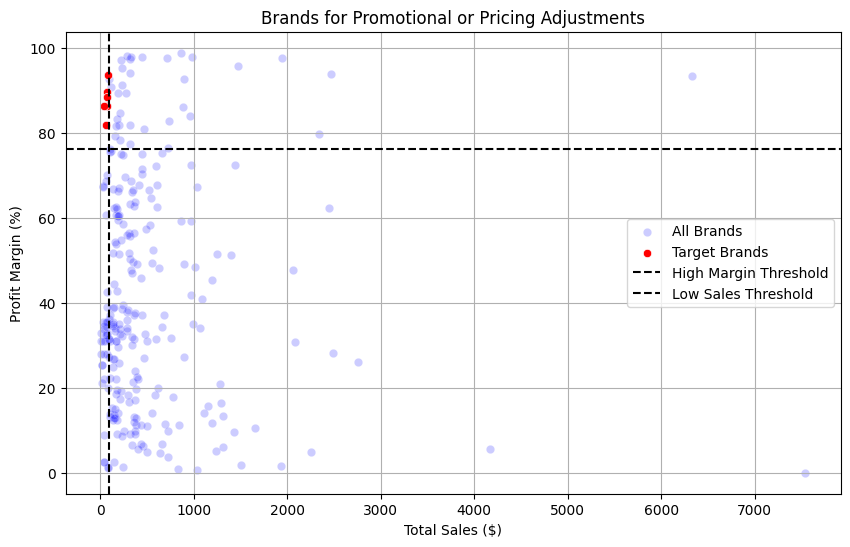

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

**Which vendors and brands demonstrate the highest sales performance?**

In [ ]:
# Top Vendors & Brands by Sales Performance
top_vendors = a.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = a.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
MARTIGNETTI COMPANIES,16278.45
M S WALKER INC,13720.78
DIAGEO NORTH AMERICA INC,12286.56
PERFECTA WINES,10775.72
SIDNEY FRANK IMPORTING CO,7543.09
PINE STATE TRADING CO,6973.68
PERNOD RICARD USA,6604.37
ULTRA BEVERAGE COMPANY LLP,6408.52
BACARDI USA INC,5035.62


/tmp/ipython-input-312928923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
/tmp/ipython-input-312928923.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")


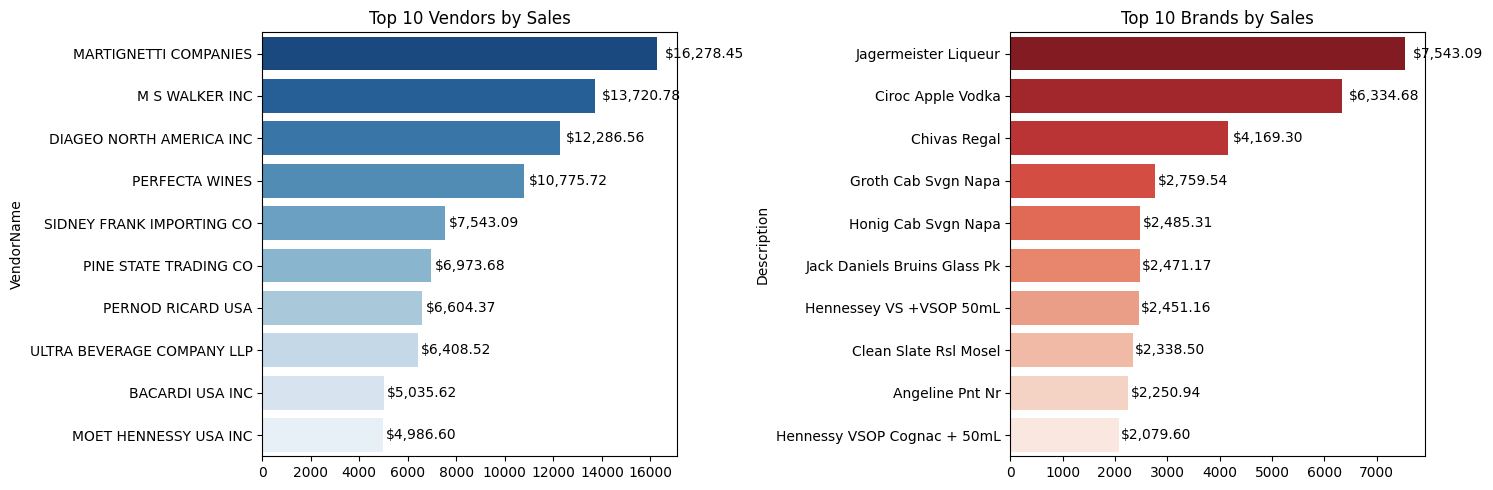

In [ ]:
def format_dollars(value):
    return f'${value:,.2f}'

plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Which vendors contribute the most to total purchase dollars?**

In [ ]:
# Rank Vendors by Total Purchase Dollars
vendor_performance = a.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars":"sum"
}).reset_index()

# Calculate Contribution % to Overall Procurement
vendor_performance["Purchase_Contribution%"] = (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100

# Rank Vendors by Total Purchase Dollars & Profitability
vendor_performance = round(vendor_performance.sort_values(by="TotalPurchaseDollars", ascending=False),2)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10).copy()
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
23,MARTIGNETTI COMPANIES,"$10,565.71","$5,712.74","$16,278.45",13.11
21,M S WALKER INC,"$9,940.83","$3,779.95","$13,720.78",12.34
38,SIDNEY FRANK IMPORTING CO,"$7,542.72",$0.37,"$7,543.09",9.36
29,PERNOD RICARD USA,"$5,392.98","$1,211.39","$6,604.37",6.69
28,PERFECTA WINES,"$5,246.34","$5,529.38","$10,775.72",6.51
8,DIAGEO NORTH AMERICA INC,"$3,889.23","$8,397.33","$12,286.56",4.83
30,PINE STATE TRADING CO,"$3,868.73","$3,104.95","$6,973.68",4.80
46,ULTRA BEVERAGE COMPANY LLP,"$3,519.28","$2,889.24","$6,408.52",4.37
0,BACARDI USA INC,"$2,890.83","$2,144.79","$5,035.62",3.59
26,MOET HENNESSY USA INC,"$2,783.98","$2,202.62","$4,986.60",3.45


/tmp/ipython-input-2916973626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
/tmp/ipython-input-2916973626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)
/tmp/ipython-input-2916973626.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)


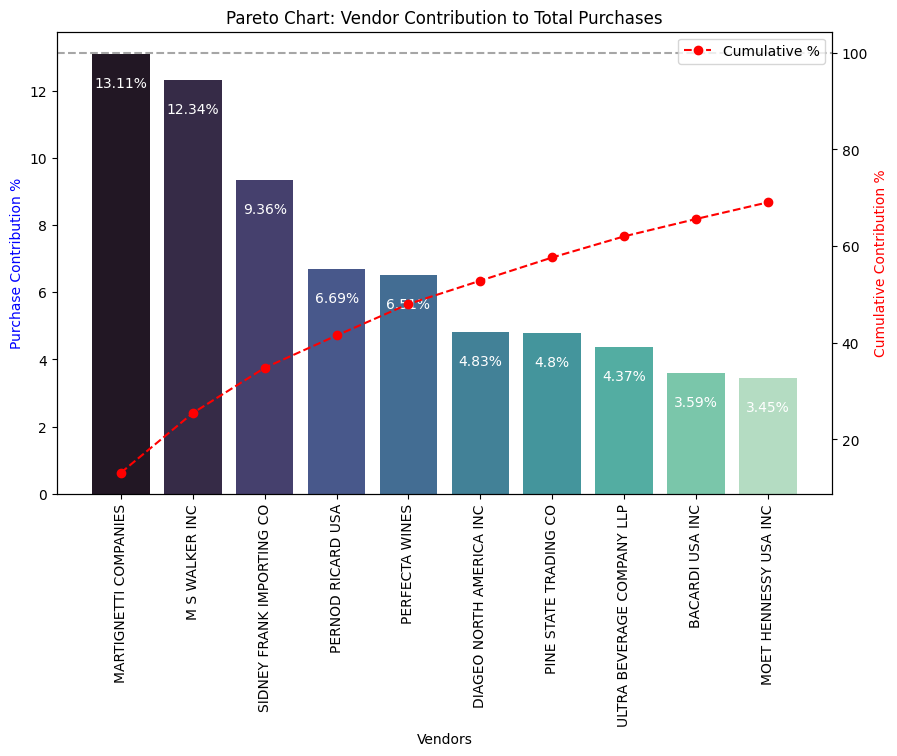

In [ ]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

**How much of total procurement is dependent on the top vendors?**

Total Purchase Contribution of top 10 vendors is 69.05 %


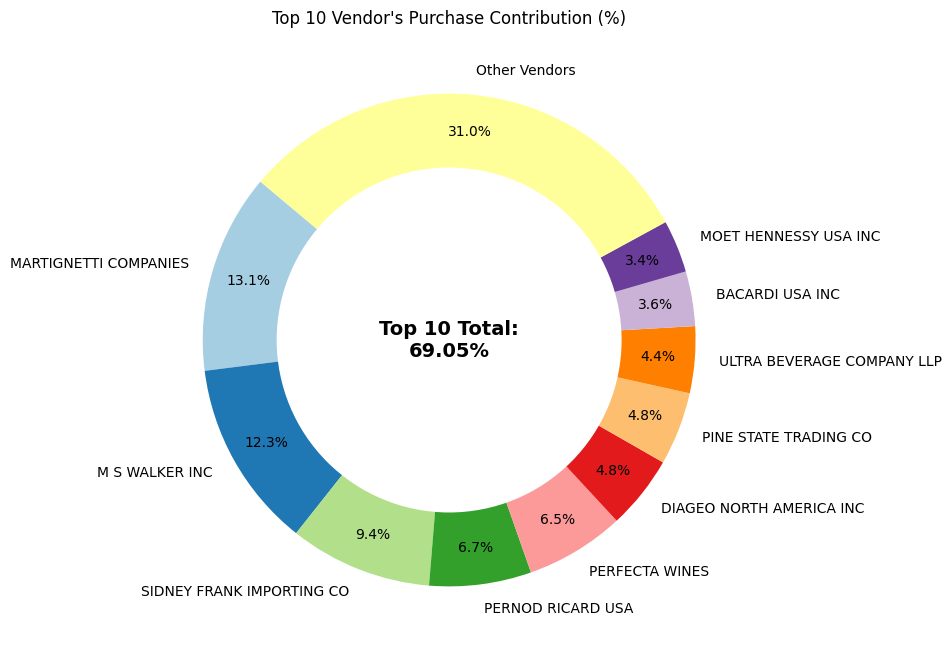

In [ ]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

**Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?**

In [ ]:
# Calculate Unit Purchase Price per Vendor & Volume Group
a["UnitPurchasePrice"] = a["TotalPurchaseDollars"] / a["TotalPurchaseQuantity"]

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
a["OrderSize"] = pd.qcut(a["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

# Analyze Cost Savings per Order Size
bulk_purchase_analysis = a.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()
print(bulk_purchase_analysis)

  OrderSize  UnitPurchasePrice
0     Small          13.903497
1    Medium          10.546000
2     Large           9.404943


/tmp/ipython-input-877116143.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulk_purchase_analysis = a.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()


/tmp/ipython-input-3068484955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=a, x="OrderSize", y="UnitPurchasePrice", palette="Set2")


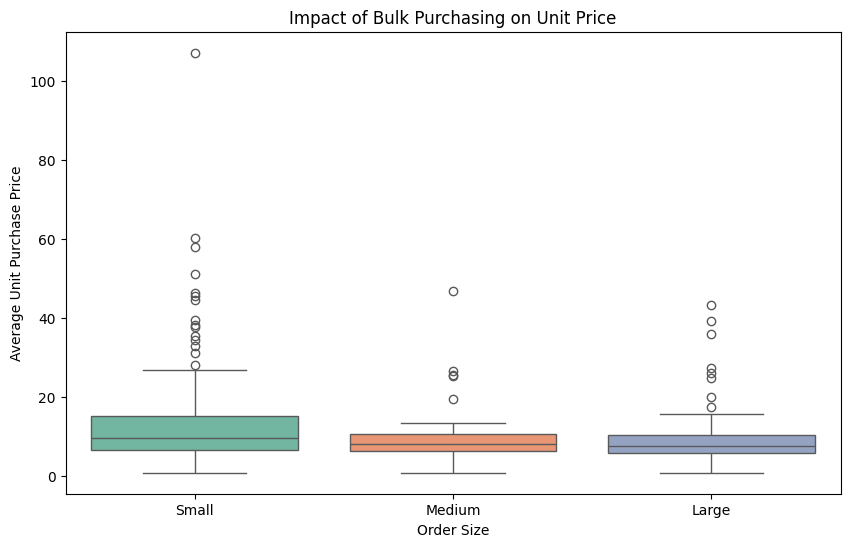

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=a, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()



*   Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
*   The price difference between Small and Large orders is substantial (~72% reduction in unit cost)


*   This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.





**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**

In [ ]:
# Identify Low Inventory Turnover Vendors
low_turnover_vendors = a[a["StockTurnover"] < 1].groupby("VendorName")["StockTurnover"].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by="StockTurnover", ascending=True)
low_turnover_vendors.head(10)

,VendorName,StockTurnover
27,STE MICHELLE WINE ESTATES,0.541667
24,SEA BREEZE CELLARS LLC,0.638554
25,SIDNEY FRANK IMPORTING CO,0.656357
5,Dunn Wine Brokers,0.666667
3,CONSTELLATION BRANDS INC,0.678388
26,SOUTHERN WINE & SPIRITS NE,0.722222
28,TREASURY WINE ESTATES,0.723810
18,MOET HENNESSY USA INC,0.727273
16,MARTIGNETTI COMPANIES,0.729985
14,M S WALKER INC,0.739378




*   Slow-moving inventory increases holding costs (warehouse rent, insurance, depreciation)
*   Identifying vendors with low inventory turnover is critical for business efficiency, cost reduction, and profitability



**How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [ ]:
# Calculate Unsold Inventory Value
a["UnsoldInventoryValue"] = (a["TotalPurchaseQuantity"] - a["TotalSalesQuantity"]) * a["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(a["UnsoldInventoryValue"].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = a.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: $-9,290.49


,VendorName,UnsoldInventoryValue
38,SIDNEY FRANK IMPORTING CO,"$2,592.00"
21,M S WALKER INC,"$1,359.44"
29,PERNOD RICARD USA,$766.38
5,CONSTELLATION BRANDS INC,$633.29
23,MARTIGNETTI COMPANIES,$577.85
11,E & J GALLO WINERY,$436.13
36,SEA BREEZE CELLARS LLC,$236.70
44,TREASURY WINE ESTATES,$210.24
39,SOUTHERN WINE & SPIRITS NE,$182.73
20,LUXCO INC,$77.17


**What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.**

In [ ]:
# Define top and low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = a["TotalSalesDollars"].quantile(0.75)
low_threshold = a["TotalSalesDollars"].quantile(0.25)

In [ ]:
top_vendors = a[a["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = a[a["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [ ]:
from scipy import stats

# Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

In [ ]:
# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

Top Vendors 95% CI: (34.18, 49.82), Mean: 42.00
Low Vendors 95% CI: (34.51, 47.45), Mean: 40.98


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

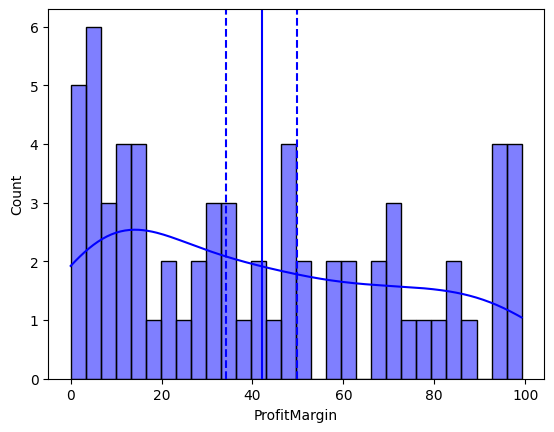

In [ ]:
# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

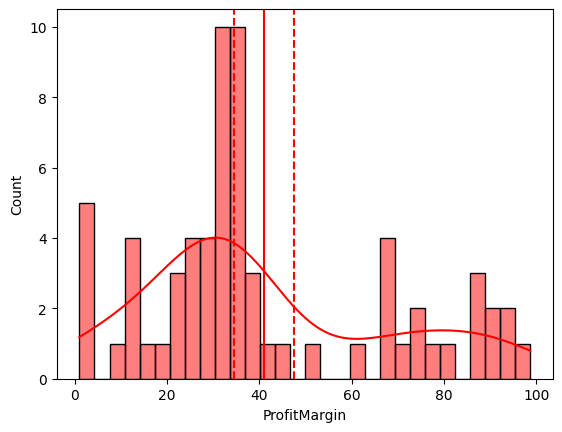

In [ ]:
# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

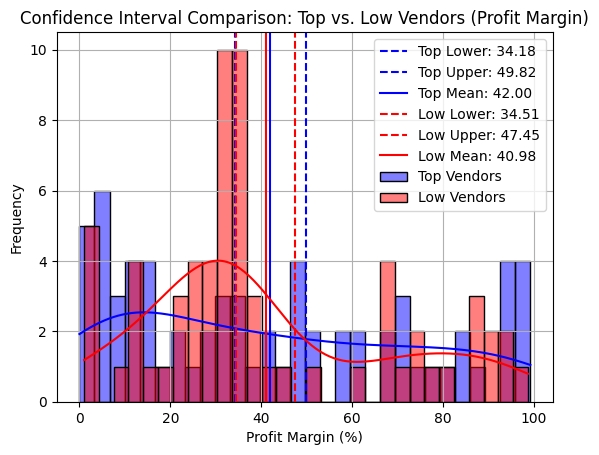

In [ ]:
# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

**Is there a significant difference in profit margins between top-performing and low-performing vendors?**

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [ ]:
from scipy import stats
from statsmodels.stats import weightstats as stests


In [ ]:
from scipy.stats import ttest_ind

top_threshold = a["TotalSalesDollars"].quantile(0.75)
low_threshold = a["TotalSalesDollars"].quantile(0.25)

top_vendors_profit_margin = a[a["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors_profit_margin = a[a["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors_profit_margin, low_vendors_profit_margin, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: 0.2012, P-Value: 0.8409
Fail to Reject H₀: No significant difference in profit margins.
